<a href="https://colab.research.google.com/github/shivamsonawane/Deloitte_Capstone_Project/blob/main/Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import pearsonr, ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
bitcoin_df = pd.read_csv('/content/bitcoindataset.csv')

In [3]:
bitcoin_df = bitcoin_df.dropna()

In [4]:
print(bitcoin_df.shape)
print(bitcoin_df.isnull().sum())

(3613769, 8)
Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


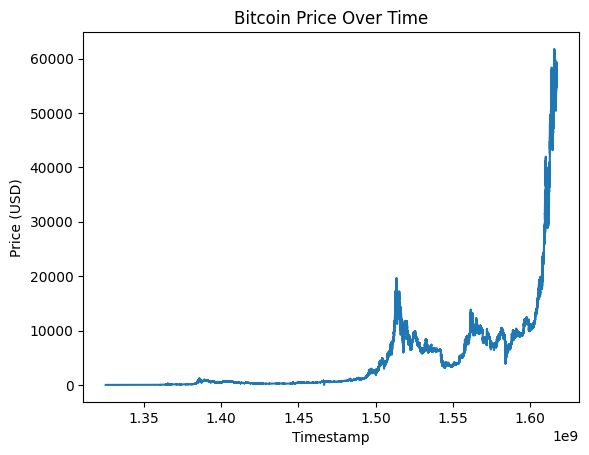

In [5]:
# Visualize the Bitcoin price over time
plt.plot(bitcoin_df['Timestamp'], bitcoin_df['Close'])
plt.xlabel('Timestamp')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price Over Time')
plt.show()

In [6]:
# Perform time series analysis using ARIMA
model = ARIMA(bitcoin_df['Close'], order=(1, 1, 1))
forecast = model.fit().forecast(steps=30)

# Perform statistical analysis on price and volume
correlation, p_value = pearsonr(bitcoin_df['Close'], bitcoin_df['Volume_(BTC)'])
t_stat, p_value = ttest_ind(bitcoin_df['Close'], bitcoin_df['Volume_(BTC)'])

# Train a linear regression model on the data
X = bitcoin_df[['Volume_(BTC)']]
y = bitcoin_df['Close']
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Mean Squared Error: 119495371.72204676


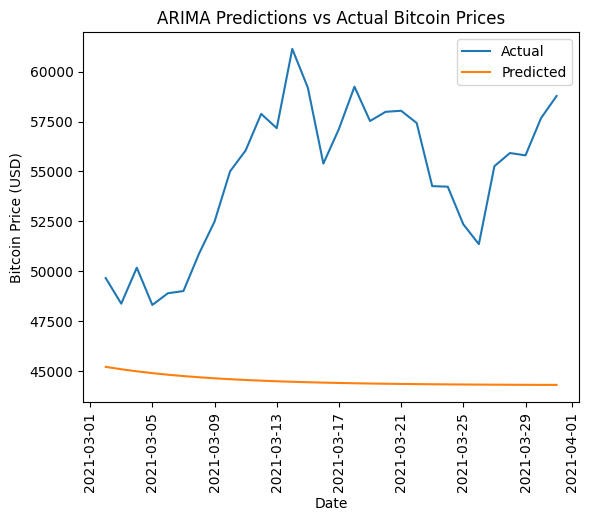

In [7]:
from sklearn.metrics import mean_squared_error

# Convert the Timestamp column to a datetime object and set it as the index
bitcoin_df['Timestamp'] = pd.to_datetime(bitcoin_df['Timestamp'], unit='s')
bitcoin_df = bitcoin_df.set_index('Timestamp')

# Resample the data to daily frequency and forward fill any missing values
bitcoin_df = bitcoin_df.resample('D').ffill()

train_data = bitcoin_df['Close'].iloc[:-30]
test_data = bitcoin_df['Close'].iloc[-30:]

# Fit the ARIMA model to the training data
model = ARIMA(train_data, order=(1,1,1))
model_fit = model.fit()

predictions = model_fit.forecast(steps=30)

mse = mean_squared_error(test_data, predictions)
print("Mean Squared Error:", mse)

plt.plot(test_data.index, test_data.values, label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.legend()
plt.title('ARIMA Predictions vs Actual Bitcoin Prices')
plt.xlabel('Date')
plt.xticks(rotation=90)

plt.ylabel('Bitcoin Price (USD)')
plt.show()


In [10]:
bitcoin_df = pd.read_csv('/content/bitcoindataset.csv')

# Convert the 'Timestamp' column to a datetime object and set it as the index
bitcoin_df['Timestamp'] = pd.to_datetime(bitcoin_df['Timestamp'], unit='s')
bitcoin_df = bitcoin_df.set_index('Timestamp')


Mean Squared Error: 46251540.67277053
R-squared: 0.4244838166012893


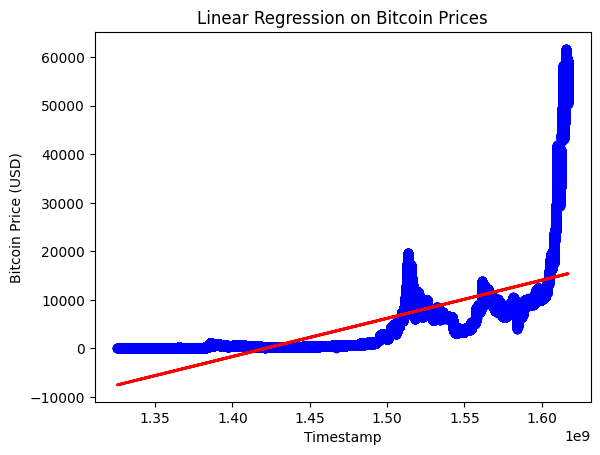

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

bitcoin_df = pd.read_csv('/content/bitcoindataset.csv')

bitcoin_df = bitcoin_df.drop(columns=['Open', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price'])
bitcoin_df = bitcoin_df.dropna()

X = bitcoin_df[['Timestamp']]
y = bitcoin_df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Linear Regression on Bitcoin Prices')
plt.xlabel('Timestamp')
plt.ylabel('Bitcoin Price (USD)')
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


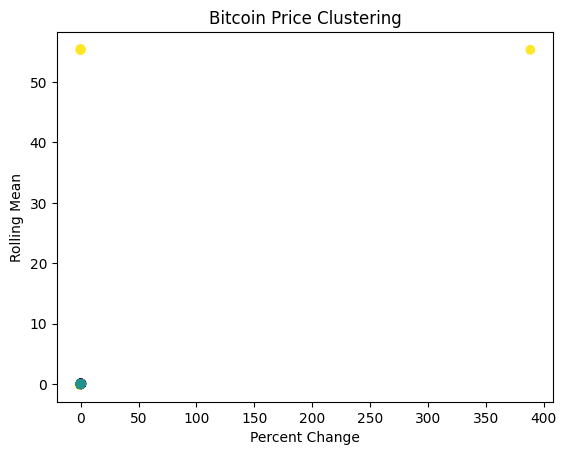

In [18]:
from sklearn.cluster import KMeans

# Calculate the percent change in price
bitcoin_df['Percent_Change'] = bitcoin_df['Close'].pct_change()

# Calculate the rolling mean of the percent change
bitcoin_df['Rolling_Mean'] = bitcoin_df['Percent_Change'].rolling(window=7).mean()

bitcoin_df = bitcoin_df.dropna()

k = 3

kmeans = KMeans(n_clusters=k)

kmeans.fit(bitcoin_df)

# Get the cluster labels for each data point
labels = kmeans.predict(bitcoin_df)

# Add a new column to the DataFrame with the cluster labels
bitcoin_df['Cluster'] = labels

plt.scatter(bitcoin_df['Percent_Change'], bitcoin_df['Rolling_Mean'], c=labels)
plt.xlabel('Percent Change')
plt.ylabel('Rolling Mean')
plt.title('Bitcoin Price Clustering')
plt.show()
